In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb

In [2]:
AOT = wb.DataReader('AOT.BK', data_source = 'yahoo', start='2018-1-1')

In [3]:
AOT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,71.00,68.75,69.00,70.50,61069900.0,68.374878
2018-01-04,71.25,70.00,71.25,70.50,37773200.0,68.374878
2018-01-05,72.25,70.50,70.75,72.00,48929600.0,69.829666
2018-01-08,77.75,72.50,72.75,74.25,127056900.0,72.011841
2018-01-09,74.00,72.25,74.00,73.25,89764400.0,71.041992
...,...,...,...,...,...,...
2019-12-12,76.00,74.50,75.25,75.50,28637500.0,75.500000
2019-12-13,76.50,75.25,76.25,75.50,14829400.0,75.500000
2019-12-16,75.25,74.00,75.00,74.25,16472500.0,74.250000


In [4]:
 AOT.index.dtype #datetime

dtype('<M8[ns]')

In [5]:
PTT = wb.DataReader('PTT.BK', data_source = 'yahoo', start='2018-1-1')

In [6]:
PTT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,45.000000,44.000000,44.200001,45.000000,81239000.0,33.339844
2018-01-04,47.200001,45.000000,45.200001,47.200001,124259000.0,34.969791
2018-01-05,47.400002,46.400002,47.200001,46.799999,87860000.0,34.673439
2018-01-08,47.200001,46.599998,46.799999,46.599998,63976000.0,34.525261
2018-01-09,46.599998,46.599998,46.599998,46.599998,5658000.0,34.525261
...,...,...,...,...,...,...
2019-12-12,43.250000,42.250000,42.250000,42.750000,48892000.0,42.750000
2019-12-13,44.750000,44.000000,44.250000,44.000000,61368700.0,44.000000
2019-12-16,44.250000,43.500000,44.250000,43.500000,47295200.0,43.500000


In [7]:
data = pd.concat([AOT.iloc[:,3], PTT.iloc[:,3]], axis=1)

In [8]:
data

,Close,Close
Date,,
2018-01-03,70.50,45.000000
2018-01-04,70.50,47.200001
2018-01-05,72.00,46.799999
2018-01-08,74.25,46.599998
2018-01-09,73.25,46.599998
...,...,...
2019-12-12,75.50,42.750000
2019-12-13,75.50,44.000000
2019-12-16,74.25,43.500000


In [9]:
data.columns = ['AOT', 'PTT']

In [10]:
data

,AOT,PTT
Date,,
2018-01-03,70.50,45.000000
2018-01-04,70.50,47.200001
2018-01-05,72.00,46.799999
2018-01-08,74.25,46.599998
2018-01-09,73.25,46.599998
...,...,...
2019-12-12,75.50,42.750000
2019-12-13,75.50,44.000000
2019-12-16,74.25,43.500000


In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

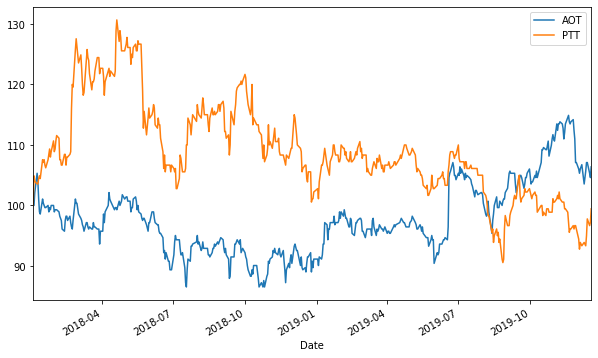

In [12]:
((data/data.iloc[0])*100).plot(figsize=(10,6))

In [13]:
log_returns = np.log(1+data.pct_change(1))

In [14]:
log_returns

,AOT,PTT
Date,,
2018-01-03,NaN,NaN
2018-01-04,0.000000,0.047731
2018-01-05,0.021053,-0.008511
2018-01-08,0.030772,-0.004283
2018-01-09,-0.013560,0.000000
...,...,...
2019-12-12,0.013334,0.017700
2019-12-13,0.000000,0.028820
2019-12-16,-0.016695,-0.011429


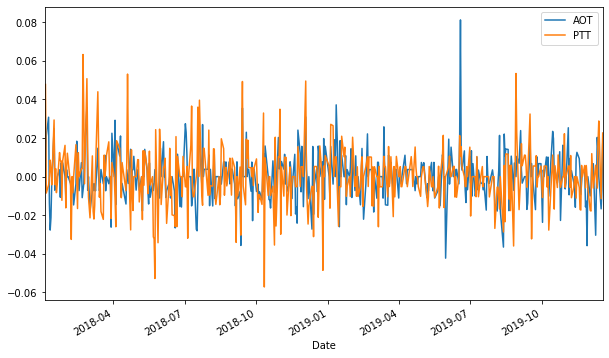

In [15]:
log_returns.plot(figsize=(10,6))

In [16]:
# annual mean
log_returns.mean()*250

AOT    0.032429
PTT   -0.002920
dtype: float64

In [17]:
# annual covariance
log_returns.cov() *250

,AOT,PTT
AOT,0.038685,0.015953
PTT,0.015953,0.055240


In [18]:
# correlation
log_returns.corr()

,AOT,PTT
AOT,1.000000,0.345101
PTT,0.345101,1.000000


In [36]:
num_assets = 2
portfolio_return = []
portfolio_volatility = []
weight_AOT = []
weight_PTT = []

for i in range(10000):
    weight = np.random.random(num_assets)
    weight /= np.sum(weight)
    weight0 = weight[0]
    weight1 = weight[1]
    returns = np.sum(weight*log_returns.mean())*250
    volatility = np.sqrt(np.dot(np.dot(log_returns.cov()*250,weight),weight.T))
    weight_AOT.append(weight0)
    weight_PTT.append(weight1)
    portfolio_return.append(returns)
    portfolio_volatility.append(volatility)

In [37]:
portfolio_return = np.array(portfolio_return)
portfolio_volatility = np.array(portfolio_volatility)
weight_AOT = np.array(weight_AOT)
weight_PTT = np.array(weight_PTT)

In [39]:
portfolios = pd.DataFrame({'weight_AOT': weight_AOT, 'weight_PTT':weight_PTT,'Returns':portfolio_return,'volatility':portfolio_volatility})

In [40]:
portfolios

,weight_AOT,weight_PTT,Returns,volatility
0,0.568383,0.431617,0.017172,0.174973
1,0.404441,0.595559,0.011377,0.183319
2,0.681897,0.318103,0.021185,0.174638
3,0.515140,0.484860,0.015290,0.176695
4,0.622179,0.377821,0.019074,0.174243
...,...,...,...,...
9995,0.339074,0.660926,0.009066,0.189019
9996,0.792807,0.207193,0.025105,0.178682
9997,0.371776,0.628224,0.010222,0.186011
9998,0.531616,0.468384,0.015872,0.176058


Text(0, 0.5, 'Expected return')

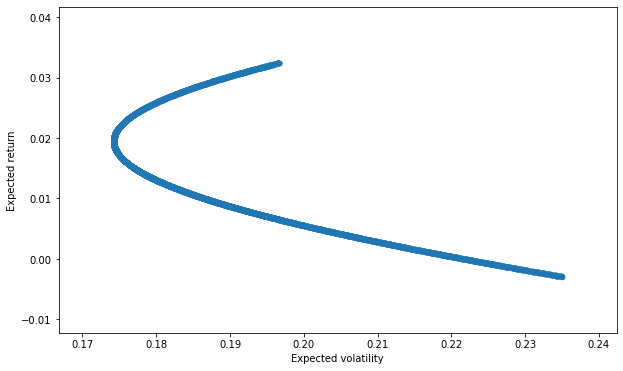

In [41]:
portfolios.plot(x = 'volatility', y= 'Returns', kind = 'scatter', figsize= (10,6))
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')